# Debug Driver Models in Urban POMDP

In [1]:
using Revise
using Random
using POMDPs
using POMDPModelTools
using POMDPPolicies
using BeliefUpdaters
using POMDPSimulators
using AutomotiveDrivingModels
using AutomotivePOMDPs
using AutomotiveSensors
using AutoViz
using Reel

┌ Info: Recompiling stale cache file /mnt/c/Users/Maxime/wsl/.julia/compiled/v1.0/AutomotivePOMDPs/L1lsd.ji for AutomotivePOMDPs [dca8afc0-c686-11e8-0934-712707da73aa]
└ @ Base loading.jl:1184


In [2]:
rng = MersenneTwister(1);

## Environment

In [3]:
params = UrbanParams(nlanes_main=1,
                     crosswalk_pos =[VecSE2(6, 0., pi/2), VecSE2(-6, 0., pi/2), VecSE2(0., -5., 0.)],
                     crosswalk_length =  [14.0, 14., 14.0],
                     crosswalk_width = [4.0, 4.0, 3.1],
                     stop_line = 22.0)
env = UrbanEnv(params=params);

In [4]:
pomdp = UrbanPOMDP(env=env,
                   sensor = PerfectSensor(),
                   ego_goal = LaneTag(2, 1),
                   max_cars=5, 
                   max_peds=5, 
                   car_birth=0.5, 
                   ped_birth=0.5, 
                   max_obstacles=0, # no fixed obstacles
                   ego_start=20,
                   ΔT=0.1);

## Simulation

In [5]:
function POMDPModelTools.generate_sori(p::UrbanPOMDP, s::UrbanState, a::UrbanAction, rng::AbstractRNG)
    return generate_sor(p, s, a, rng)..., deepcopy(p.models)
end

In [18]:
still_policy = FunctionPolicy(s -> UrbanAction(0.))
up = NothingUpdater()
s0 = initialstate(pomdp, rng)
models0 = deepcopy(pomdp.models)
hr = HistoryRecorder(rng=rng, max_steps=200)
@time hist = simulate(hr, pomdp, still_policy, up, nothing, s0);
insert!(hist.info_hist, 1, models0);

veh 2 | clogged false | passed false | engaged true | stop false| right of way false
veh 3 | clogged false | passed true | engaged true | stop false| right of way true
veh 4 | clogged false | passed true | engaged false | stop false| right of way true
veh 5 | clogged true | passed false | engaged false | stop false| right of way true
veh 2 | clogged false | passed false | engaged true | stop false| right of way false
veh 3 | clogged false | passed true | engaged true | stop false| right of way true
veh 4 | clogged false | passed true | engaged false | stop false| right of way true
veh 5 | clogged true | passed false | engaged false | stop false| right of way true
veh 2 | clogged false | passed false | engaged true | stop false| right of way false
veh 3 | clogged false | passed true | engaged true | stop false| right of way true
veh 4 | clogged false | passed true | engaged false | stop false| right of way true
veh 5 | clogged true | passed false | engaged false | stop false| right of w

veh 2 | clogged true | passed true | engaged true | stop true| right of way false
veh 3 | clogged false | passed true | engaged false | stop false| right of way true
veh 5 | clogged true | passed false | engaged false | stop false| right of way true
veh 6 | clogged true | passed false | engaged false | stop false| right of way true
veh 2 | clogged true | passed true | engaged true | stop true| right of way false
veh 3 | clogged false | passed true | engaged false | stop false| right of way true
veh 5 | clogged true | passed false | engaged false | stop false| right of way true
veh 6 | clogged true | passed false | engaged false | stop false| right of way true
veh 4 | clogged true | passed false | engaged false | stop false| right of way true
veh 2 | clogged true | passed true | engaged true | stop true| right of way false
veh 5 | clogged true | passed false | engaged false | stop false| right of way true
veh 6 | clogged true | passed false | engaged false | stop false| right of way tru

veh 2 | clogged true | passed true | engaged true | stop true| right of way false
veh 5 | clogged true | passed false | engaged false | stop false| right of way true
veh 6 | clogged true | passed false | engaged false | stop false| right of way true
veh 4 | clogged true | passed false | engaged false | stop false| right of way true
veh 3 | clogged true | passed false | engaged false | stop false| right of way false
veh 2 | clogged true | passed true | engaged true | stop true| right of way false
veh 5 | clogged true | passed false | engaged false | stop false| right of way true
veh 6 | clogged true | passed false | engaged false | stop false| right of way true
veh 4 | clogged true | passed false | engaged false | stop false| right of way true
veh 3 | clogged true | passed false | engaged false | stop false| right of way false
veh 2 | clogged true | passed true | engaged true | stop true| right of way false
veh 5 | clogged true | passed false | engaged false | stop false| right of way t

veh 2 | clogged true | passed true | engaged true | stop true| right of way false
veh 5 | clogged true | passed false | engaged false | stop false| right of way true
veh 6 | clogged true | passed false | engaged false | stop false| right of way true
veh 4 | clogged true | passed false | engaged false | stop false| right of way true
veh 3 | clogged true | passed false | engaged false | stop false| right of way false
veh 2 | clogged true | passed true | engaged true | stop true| right of way false
veh 5 | clogged true | passed false | engaged false | stop false| right of way true
veh 6 | clogged true | passed false | engaged false | stop false| right of way true
veh 4 | clogged true | passed false | engaged false | stop false| right of way true
veh 3 | clogged true | passed false | engaged false | stop false| right of way false
veh 2 | clogged true | passed true | engaged true | stop true| right of way false
veh 5 | clogged true | passed false | engaged false | stop false| right of way t

veh 2 | clogged true | passed true | engaged true | stop true| right of way false
veh 5 | clogged true | passed false | engaged false | stop false| right of way true
veh 6 | clogged true | passed false | engaged false | stop false| right of way true
veh 4 | clogged true | passed false | engaged false | stop false| right of way true
veh 3 | clogged true | passed false | engaged false | stop false| right of way false
veh 2 | clogged true | passed true | engaged true | stop true| right of way false
veh 5 | clogged true | passed false | engaged false | stop false| right of way true
veh 6 | clogged true | passed false | engaged false | stop false| right of way true
veh 4 | clogged true | passed false | engaged false | stop false| right of way true
veh 3 | clogged true | passed false | engaged false | stop false| right of way false
veh 2 | clogged true | passed true | engaged true | stop true| right of way false
veh 5 | clogged true | passed false | engaged false | stop false| right of way t

veh 6 | clogged true | passed false | engaged false | stop false| right of way true
veh 4 | clogged true | passed false | engaged false | stop false| right of way true
veh 3 | clogged true | passed false | engaged false | stop false| right of way false
veh 2 | clogged false | passed true | engaged true | stop false| right of way false
veh 5 | clogged true | passed false | engaged false | stop false| right of way true
veh 6 | clogged true | passed false | engaged false | stop false| right of way true
veh 4 | clogged true | passed false | engaged false | stop false| right of way true
veh 3 | clogged true | passed false | engaged false | stop false| right of way false
veh 2 | clogged false | passed true | engaged true | stop false| right of way false
veh 5 | clogged true | passed false | engaged false | stop false| right of way true
veh 6 | clogged true | passed false | engaged false | stop false| right of way true
veh 4 | clogged true | passed false | engaged false | stop false| right of

veh 6 | clogged true | passed false | engaged false | stop false| right of way true
veh 4 | clogged true | passed false | engaged false | stop false| right of way true
veh 3 | clogged true | passed false | engaged false | stop false| right of way false
veh 2 | clogged false | passed true | engaged false | stop false| right of way false
veh 5 | clogged true | passed false | engaged false | stop true| right of way true
veh 6 | clogged true | passed false | engaged false | stop false| right of way true
veh 4 | clogged true | passed false | engaged false | stop false| right of way true
veh 3 | clogged true | passed false | engaged false | stop false| right of way false
veh 2 | clogged false | passed true | engaged false | stop false| right of way false
veh 5 | clogged true | passed false | engaged false | stop true| right of way true
veh 6 | clogged true | passed false | engaged false | stop true| right of way true
veh 4 | clogged true | passed false | engaged false | stop false| right of 

veh 2 | clogged false | passed true | engaged false | stop false| right of way false
veh 5 | clogged false | passed false | engaged false | stop true| right of way true
veh 6 | clogged false | passed false | engaged false | stop true| right of way true
veh 4 | clogged false | passed false | engaged false | stop false| right of way true
veh 3 | clogged false | passed false | engaged false | stop false| right of way false
veh 2 | clogged false | passed true | engaged false | stop false| right of way false
veh 5 | clogged false | passed false | engaged false | stop true| right of way true
veh 6 | clogged false | passed false | engaged false | stop true| right of way true
veh 4 | clogged false | passed false | engaged false | stop false| right of way true
veh 3 | clogged false | passed false | engaged false | stop false| right of way false
veh 2 | clogged false | passed true | engaged false | stop false| right of way false
veh 5 | clogged false | passed false | engaged false | stop true| r

veh 6 | clogged true | passed false | engaged false | stop true| right of way true
veh 4 | clogged true | passed false | engaged false | stop false| right of way true
veh 3 | clogged true | passed false | engaged false | stop false| right of way false
veh 2 | clogged true | passed false | engaged false | stop false| right of way true
veh 5 | clogged true | passed false | engaged false | stop true| right of way true
veh 6 | clogged true | passed false | engaged false | stop true| right of way true
veh 4 | clogged true | passed false | engaged false | stop false| right of way true
veh 3 | clogged true | passed false | engaged false | stop false| right of way false
veh 2 | clogged true | passed false | engaged false | stop false| right of way true
veh 5 | clogged true | passed false | engaged false | stop true| right of way true
veh 6 | clogged true | passed false | engaged false | stop true| right of way true
veh 4 | clogged true | passed false | engaged false | stop false| right of way 

In [19]:
duration, fps, render_rec = animate_scenes(hist.state_hist, hist.info_hist, pomdp.env, overlays=SceneOverlay[IDOverlay()], sim_dt=pomdp.ΔT, cam = StaticCamera(VecE2(0., -8.), 14.0))
speed_factor = 2
film = roll(render_rec, fps = speed_factor*fps, duration = duration/speed_factor)

Frames{MIME{Symbol("image/png")}}("/tmp/tmpya25PF", 0x00000000000000c9, 20.0, nothing)

## Debugging

In [10]:
step = 180
s = hist.state_hist[step]
vehid = 2
veh = s[findfirst(vehid, s)]
m = hist.info_hist[step][vehid]
cwid = 2
cwm = m.crosswalk_drivers[cwid]
intm = m.intersection_driver

TTCIntersectionDriver
  a: LonAccelDirection
  navigator: RouteFollowingIDM
  intersection: Array{Lane}((2,))
  intersection_pos: VecSE2{Float64}
  ttc_threshold: Float64 3.0
  horizon: Float64 20.0
  stop_delta: Float64 4.0
  accel_tol: Float64 0.0
  priorities: Dict{Tuple{LaneTag,LaneTag},Bool}
  priority: Bool false
  stop: Bool false


In [12]:
AutomotivePOMDPs.observe!(deepcopy(intm), s, env.roadway, vehid)

veh 2 | clogged true | passed false | engaged true | stop false| right of way true


TTCIntersectionDriver
  a: LonAccelDirection
  navigator: RouteFollowingIDM
  intersection: Array{Lane}((2,))
  intersection_pos: VecSE2{Float64}
  ttc_threshold: Float64 3.0
  horizon: Float64 20.0
  stop_delta: Float64 4.0
  accel_tol: Float64 0.0
  priorities: Dict{Tuple{LaneTag,LaneTag},Bool}
  priority: Bool false
  stop: Bool false


In [13]:
veh = s[findfirst(3, s)]
sqrt(normsquared(VecE2(intm.intersection_pos - veh.state.posG)))

4.914509131134061

In [106]:
egoid = vehid
scene = s
model = deepcopy(intm)
roadway = env.roadway
ego = scene[findfirst(egoid, scene)]
AutomotiveDrivingModels.observe!(model.navigator, scene, roadway, egoid) # set the direction
dir = model.navigator.dir
a_lon =0.
a_lon_idm = model.navigator.a
passed = AutomotivePOMDPs.has_passed(model, scene, roadway, egoid)
is_engaged = AutomotivePOMDPs.engaged(model, scene, roadway, egoid)
right_of_way = model.priorities[(model.navigator.route[1].tag,model.navigator.route[end].tag)]
is_clogged = AutomotivePOMDPs.is_intersection_clogged(model, scene, roadway, egoid)
println("is clogged: $is_clogged")
ttc = AutomotivePOMDPs.ttc_check(model, scene, roadway, egoid)
println("ttc")
model.priority = ttc || right_of_way
if !model.stop
    AutomotivePOMDPs.update_stop!(model, ego, roadway)
end

if isempty(model.intersection) || passed 
    a_lon = a_lon_idm 
elseif !passed 
    if right_of_way
        if is_clogged && !passed && is_engaged && !isapprox(ego.state.v, 0.)
            println("Vehicle $egoid : emergency break")
            a_lon = -model.navigator.d_max
        else
            a_lon = a_lon_idm
        end
    else # left turn
        if !ttc && !is_engaged  # before left turn
            a_lon = min(a_lon_idm, stop_at_end(model, ego, roadway))
        elseif  is_clogged && !passed && is_engaged && !isapprox(ego.state.v, 0.)
            # println("Vehicle $egoid : emergency break")
            a_lon = -model.navigator.d_max
        elseif ttc 
            a_lon = a_lon_idm 
        end
    end
end
a_lon

is clogged: true
ttc


0.3551011560345412

In [71]:
methods(get_neighbor_fore_along_lane)

# 4 methods for generic function "get_neighbor_fore_along_lane":
[1] get_neighbor_fore_along_lane(scene::Frame{Entity{S,D,I}}, roadway::Roadway, tag_start::LaneTag, s_base::Float64; max_distance_fore, index_to_ignore) where {S<:VehicleState, D<:Union{BicycleModel, VehicleDef}, I} in AutomotiveDrivingModels at /mnt/c/Users/Maxime/wsl/.julia/packages/AutomotiveDrivingModels/V7hw8/src/2d/vehicles/scenes.jl:190
[2] get_neighbor_fore_along_lane(scene::Frame{Entity{S,D,I}}, roadway::Roadway, tag_start::LaneTag, s_base::Float64, targetpoint_primary::VehicleTargetPoint, targetpoint_valid::VehicleTargetPoint; max_distance_fore, index_to_ignore) where {S<:VehicleState, D<:Union{BicycleModel, VehicleDef}, I} in AutomotiveDrivingModels at /mnt/c/Users/Maxime/wsl/.julia/packages/AutomotiveDrivingModels/V7hw8/src/2d/vehicles/scenes.jl:49
[3] get_neighbor_fore_along_lane(scene::Frame{Entity{S,D,I}}, vehicle_index::Int64, roadway::Roadway; max_distance_fore) where {S<:VehicleState, D<:Union{BicycleModel, VehicleDef}, I} in AutomotiveDrivingModels at /mnt/c/Users/Maxime/wsl/.julia/packages/AutomotiveDrivingModels/V7hw8/src/2d/vehicles/scenes.jl:199
[4] get_neighbor_fore_along_lane(scene::Frame{Entity{S,D,I}}, vehicle_index::Int64, roadway::Roadway, targetpoint_ego::VehicleTargetPoint, targetpoint_primary::VehicleTargetPoint, targetpoint_valid::VehicleTargetPoint; max_distance_fore) where {S<:VehicleState, D<:Union{BicycleModel, VehicleDef}, I} in AutomotiveDrivingModels at /mnt/c/Users/Maxime/wsl/.julia/packages/AutomotiveDrivingModels/V7hw8/src/2d/vehicles/scenes.jl:116

In [111]:
mm = deepcopy(m)
observe!(mm, s, env.roadway, vehid)
mm.a

 ID 4 stop true priority false


LonAccelDirection(2.0, 1)

In [105]:
intm.priorities[(intm.navigator.route[1].tag,intm.navigator.route[end].tag)]
intm.a

LonAccelDirection(-0.2887047285775486, 1)

In [106]:
AutomotivePOMDPs.has_passed(intm, s, env.roadway, vehid)

true

In [110]:
AutomotivePOMDPs.engaged(intm, s, env.roadway, vehid)

true

In [107]:
AutomotivePOMDPs.has_passed(cwm, veh, env.roadway)

LonAccelDirection(-0.2887047285775486, 1)

In [94]:
AutomotivePOMDPs.ttc_check(intm, s, env.roadway, vehid)

false

In [55]:
AutomotivePOMDPs.stop_at_end(intm, veh, env.roadway)

1.9374590063330575

In [56]:
intm.navigator.a

2.0

In [253]:
veh2 = s[findfirst(5, s)]
AutomotivePOMDPs.is_behind(veh, veh2, env.roadway)

true

In [251]:
lane1 = get_lane(env.roadway, veh)
# project veh2 on lane2 
veh2_l1 = Frenet(veh2.state.posG, lane1, env.roadway)
Frenet(proj(veh2.state.posG, lane1, env.roadway, move_along_curves=false), env.roadway)

Frenet(RoadIndex({0, 0.000000}, {10, 1}), 0.000, -0.000, 0.000)

In [222]:
get_neighbor_rear_along_lane(s, vehid, env.roadway)
fieldnames(NeighborLongitudinalResult)

(:ind, :Δs)

In [216]:
methods(get_neighbor_rear_along_lane)

# 4 methods for generic function "get_neighbor_rear_along_lane":
[1] get_neighbor_rear_along_lane(scene::Frame{Entity{S,D,I}}, roadway::Roadway, tag_start::LaneTag, s_base::Float64; max_distance_rear, index_to_ignore) where {S<:VehicleState, D<:Union{BicycleModel, VehicleDef}, I} in AutomotiveDrivingModels at /mnt/c/Users/Maxime/wsl/.julia/dev/AutomotiveDrivingModels/src/2d/vehicles/scenes.jl:380
[2] get_neighbor_rear_along_lane(scene::Frame{Entity{S,D,I}}, roadway::Roadway, tag_start::LaneTag, s_base::Float64, targetpoint_primary::VehicleTargetPoint, targetpoint_valid::VehicleTargetPoint; max_distance_rear, index_to_ignore) where {S<:VehicleState, D<:Union{BicycleModel, VehicleDef}, I} in AutomotiveDrivingModels at /mnt/c/Users/Maxime/wsl/.julia/dev/AutomotiveDrivingModels/src/2d/vehicles/scenes.jl:231
[3] get_neighbor_rear_along_lane(scene::Frame{Entity{S,D,I}}, vehicle_index::Int64, roadway::Roadway; max_distance_rear) where {S<:VehicleState, D<:Union{BicycleModel, VehicleDef}, I} in AutomotiveDrivingModels at /mnt/c/Users/Maxime/wsl/.julia/dev/AutomotiveDrivingModels/src/2d/vehicles/scenes.jl:389
[4] get_neighbor_rear_along_lane(scene::Frame{Entity{S,D,I}}, vehicle_index::Int64, roadway::Roadway, targetpoint_ego::VehicleTargetPoint, targetpoint_primary::VehicleTargetPoint, targetpoint_valid::VehicleTargetPoint; max_distance_rear) where {S<:VehicleState, D<:Union{BicycleModel, VehicleDef}, I} in AutomotiveDrivingModels at /mnt/c/Users/Maxime/wsl/.julia/dev/AutomotiveDrivingModels/src/2d/vehicles/scenes.jl:306

In [150]:
cwm.wait_list
cwm.a

# AutomotivePOMDPs.update_priority!(cwm, s, env.roadway, vehid)
cwm.a
dist_to_cw = AutomotivePOMDPs.get_distance_to_crosswalk(cwm, veh, env.roadway, -cwm.stop_delta)
# AutomotivePOMDPs.stop_at_dist(cwm, veh, dist_to_cw)
cwm.navigator.a, cwm.a, veh.state.v

(-1.497428808846675, LonAccelDirection(-1.497428808846675, 1), 0.0)

In [31]:
using Parameters
@with_kw struct BlinkerOverlay <: SceneOverlay
    on::Bool = false 
    right::Bool = true
    veh::Vehicle = Vehicle(VehicleState(), VehicleDef(), 0)
    color::Colorant = colorant"0xFFEF00FF" # yellow 
    size::Float64 = 0.3
end

function AutoViz.render!(rendermodel::RenderModel, overlay::BlinkerOverlay, scene::Scene, roadway::Roadway)
    if !overlay.on
        return nothing 
    end
    if overlay.right 
        pos = get_front(overlay.veh) + polar(overlay.veh.def.width/2, overlay.veh.state.posG.θ - pi/2)
    else
        pos = get_front(overlay.veh) + polar(overlay.veh.def.width/2, overlay.veh.state.posG.θ + pi/2)
    end
    add_instruction!(rendermodel, render_circle, (pos.x, pos.y, overlay.size, overlay.color))    
end

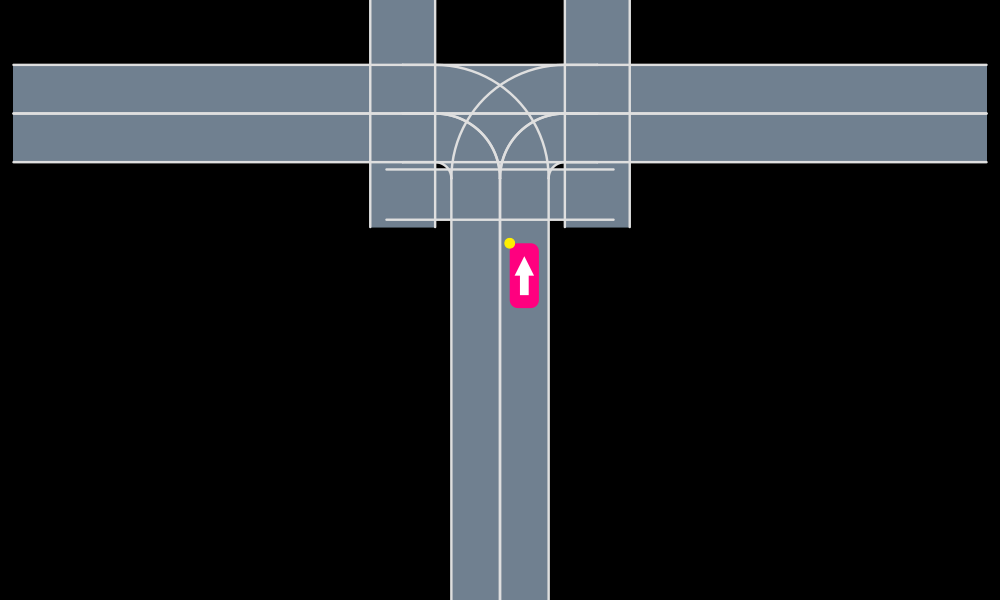

In [34]:
scene = Scene()
veh = hist.state_hist[1][3]
push!(scene, veh)
AutoViz.render(scene, env.roadway, SceneOverlay[BlinkerOverlay(on=true, right=false, veh=veh)], cam=FitToContentCamera(0.0))

In [10]:
using Vec

In [11]:
?polar

search: polar get_polar_angle PolicyWrapper POMDPSimulators



No documentation found.

`Vec.polar` is a `Function`.

```
# 2 methods for generic function "polar":
[1] polar(r::Real, θ::Real) in Vec at /mnt/c/Users/Maxime/wsl/.julia/packages/Vec/IUi0p/src/vecE2.jl:13
[2] polar(r::Real, ϕ::Real, θ::Real) in Vec at /mnt/c/Users/Maxime/wsl/.julia/packages/Vec/IUi0p/src/vecSE2.jl:19
```
